# Example 2. Electromiography and Force

Compute the delay between the force signal and the EMG envelope.

In [2]:
%pylab inline
import novainstrumentation as ni
import seaborn

Populating the interactive namespace from numpy and matplotlib


## 1. Load data and plot 

5000


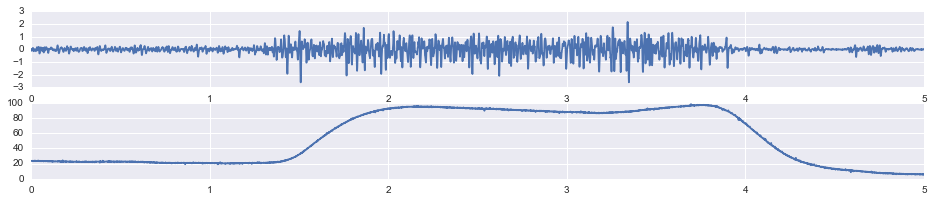

In [13]:
figure(figsize=(16,3))
te,emg = loadtxt('data/emg.txt')
subplot(2,1,1)
plot(te,emg)

tf,force = loadtxt('data/force.txt')

subplot(2,1,2)
plot(tf,force)


## 2. Clean and ressample
Execute: 
* a) extract the envolepe with the abs and smooth filter with a window of 250 samples  
* b) do ressample both time and signal subsanling a ration of 1:10
* c) smooth and ressample the force signal
* d) normalize in amplitude both signals
* e) plot result


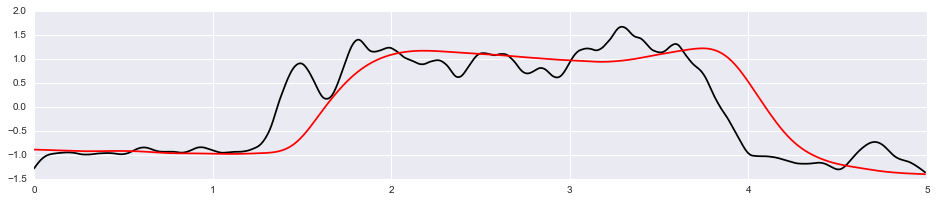

In [16]:
def normalize(s):
    return (s-mean(s))/std(s)

emg_ = ni.smooth(abs(emg),250) 
emg_ = emg_[::10]
te_ = te[::10]
emg_ = (emg_-mean(emg_))/std(emg_)

force_ = ni.smooth(force,250) 
force_ = force_[::10]
tf_ = tf[::10]
force_ =normalize(force_)

figure(figsize=(16,3))
plot(te_, emg_,'k')
plot(tf_, force_,'r')

## 3. Extract delay:

* a) Use scipy.signal.correlate on the two signals and detect the max value of convolution
* b) Detect onset on both signals and compare the vale
* c) plot the superimposed of the aligned signals


-0.21


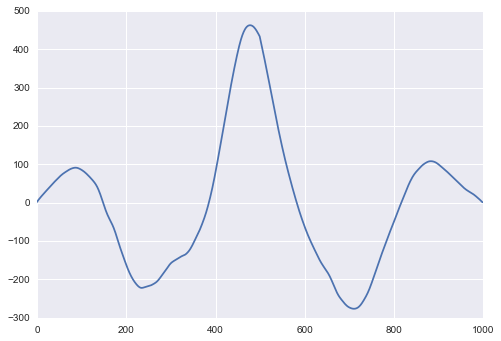

In [53]:
from scipy.signal import correlate
plot(correlate(emg_,force_))
delay = (len(emg_)-argmax(correlate(force_,emg_))) * diff(te_)[1] 
print (delay)

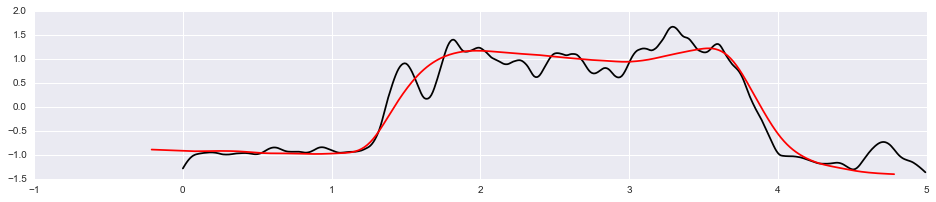

In [55]:
figure(figsize=(16,3))
plot(te_, emg_,'k')
plot(tf_+delay, force_,'r')